In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df=pd.read_excel('RE_Data.xlsx')

In [3]:
df = df.drop(df.columns[df.columns.str.contains('unnamed', case=False)], axis=1)

In [4]:
# Shuffle the DataFrame
df_shuff = df[0:50_000]

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
var_columns = [c for c in df_shuff if c not in ['ph','ph_labels']]

X = df_shuff.loc[:,var_columns].values
y = df_shuff.loc[:,'ph_labels'].values

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42,shuffle=True)

In [8]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
# Create the model
model = KNeighborsClassifier(weights= 'distance', n_neighbors= 11, metric='euclidean')

# Use the KFold function to split the data into 5 folds
kf = KFold(n_splits=5)

# Use the cross_val_score function to calculate the accuracy scores for each fold
accuracies_train = cross_val_score(model, X_train, y_train, cv=kf)
# Use the cross_val_score function to calculate the accuracy scores for each fold
accuracies_test = cross_val_score(model, X_test, y_test, cv=kf)
# Calculate the mean accuracy score across all the folds
mean_accuracy_train = accuracies_train.mean()
mean_accuracy_test = accuracies_test.mean()
print(f"Mean accuracy_train: {mean_accuracy_train:.3f}")
print(f"Mean accuracy_test: {mean_accuracy_test:.3f}")


Mean accuracy_train: 0.986
Mean accuracy_test: 0.969


In [9]:
# %timeit 
# %timeit 
model.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=11, weights='distance')

In [10]:
from sklearn.inspection import permutation_importance

# Assuming you have trained a model named 'model' and have X_test and y_test as your test data
result = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=42)

importances = result.importances_mean

In [11]:
importances

array([0.44242667, 0.68676667, 0.58727333, 0.46636   ])

In [12]:
X

array([[1.01453973, 1.03422478, 1.00536735, 1.01012954],
       [0.99648304, 1.00676816, 0.99611219, 0.99663242],
       [0.97689244, 0.99996001, 0.97513185, 0.97689621],
       ...,
       [0.94227888, 0.97475218, 0.94160997, 0.94282857],
       [1.00002718, 1.0221754 , 0.99267274, 0.99691892],
       [0.98602115, 0.99246708, 0.98594222, 0.98612915]])

In [13]:
# predictions_n = model.predict(X_test)

In [14]:
import numpy as np
from sklearn.model_selection import KFold, cross_val_predict
from sklearn.metrics import confusion_matrix

# Assuming X and y are your data and labels, and clf is your classifier object
kf = KFold(n_splits=5)
y_pred = cross_val_predict(model, X_test, y_test, cv=kf)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Print the confusion matrix
print(cm)

[[3789   29    0    0]
 [ 125 3530   46    0]
 [   0   67 3535  117]
 [   0    0   81 3681]]


Text(0.5, 1.0, 'Confusion Matrix ($f_1$)')

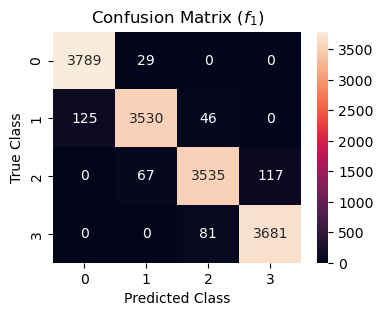

In [15]:
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix


# y_true and y_pred are lists or arrays of the true and predicted labels, respectively
plt.figure(figsize=(4,3))
# Create the confusion matrix
# cm = confusion_matrix(y_test, predictions_n)

# Create a heatmap of the confusion matrix
sns.heatmap(cm, annot=True, fmt='d')

# Add labels to the plot
plt.ylabel('True Class')
plt.xlabel('Predicted Class')
plt.title('Confusion Matrix ($f_1$)')
# plt.savefig('Confusion Matrix (Logistic Regression).jpeg',dpi=300)
# Show the plot
# plt.savefig('con_f1.jpeg',dpi=300)

In [15]:
import pickle

# Train your machine learning model and save it to a variable named 'model'

# Save the model to a file named 'model.pkl'
with open('KNN_4_1_45k', 'wb') as file:
    pickle.dump(model, file)

In [16]:
datasize_tr = np.array([700,6500,7000,10500,14000,17500,21000,24500,28000,31500,35000])
datasize_vl = np.array([300,1500,3000,4500,6000,7500,9000,10500,12000,13500,15000])

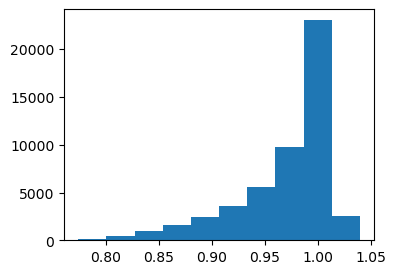

In [17]:
plt.figure(figsize=(4,3))
plt.hist(df.c1.values)
plt.show()

In [18]:
np.max(df.c4.values)

1.027099166574896